In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
book_movie = pd.read_csv('book_movie_database.csv')

In [189]:
book_movie.shape

(692, 10)

In [190]:
book_movie.dtypes

book_title               object
book_rating             float64
book_number_ratings       int64
book_year_published     float64
popularity              float64
release_date             object
movie_runtime             int64
movie_rating            float64
movie_number_ratings      int64
genres                   object
dtype: object

In [191]:
book_movie.describe().round(2)

,book_rating,book_number_ratings,book_year_published,popularity,movie_runtime,movie_rating,movie_number_ratings
count,692.00,692.00,691.00,692.00,692.00,692.00,692.00
mean,3.92,338229.38,1938.19,7.98,112.61,6.44,595.48
std,0.22,565192.76,96.34,8.28,32.19,0.90,1162.89
min,3.08,209.00,1536.00,0.03,25.00,2.00,1.00
25%,3.80,34436.00,1918.50,2.48,95.00,5.90,20.00
50%,3.94,151602.00,1976.00,6.85,107.50,6.50,131.50
75%,4.07,403176.50,1998.00,10.76,125.00,7.00,635.75
max,4.56,5680570.00,2018.00,88.44,386.00,10.00,9678.00


To begin, visualize the data:

In [192]:
book_movie.corr()

,book_rating,book_number_ratings,book_year_published,popularity,movie_runtime,movie_rating,movie_number_ratings
book_rating,1.000000,0.237532,0.024557,0.082068,0.001495,0.255455,0.200784
book_number_ratings,0.237532,1.000000,-0.063259,0.183304,0.119640,0.111955,0.341852
book_year_published,0.024557,-0.063259,1.000000,0.249950,-0.099432,0.028697,0.212706
popularity,0.082068,0.183304,0.249950,1.000000,0.093390,0.258327,0.685483
movie_runtime,0.001495,0.119640,-0.099432,0.093390,1.000000,0.156575,0.126660
movie_rating,0.255455,0.111955,0.028697,0.258327,0.156575,1.000000,0.310184
movie_number_ratings,0.200784,0.341852,0.212706,0.685483,0.126660,0.310184,1.000000


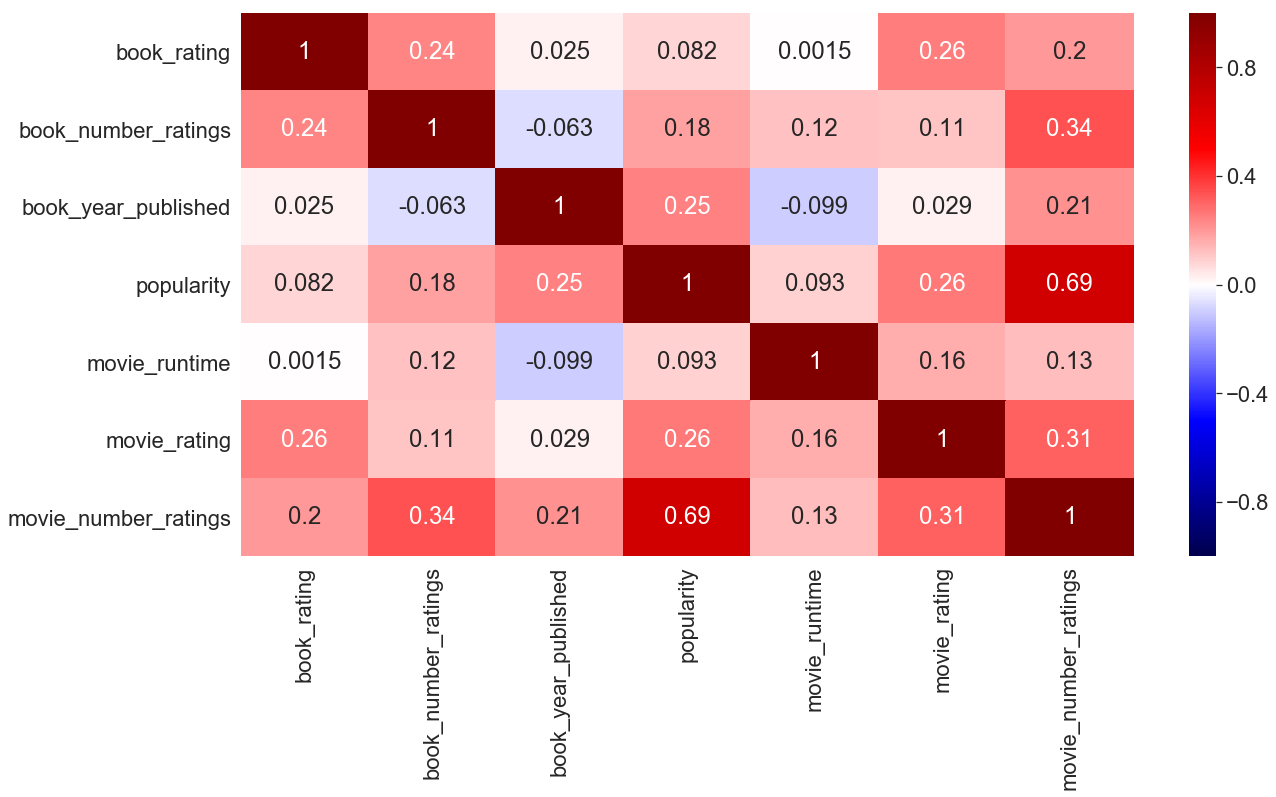

In [193]:
sns.set(font_scale=2) 
plt.figure(figsize=(20,10))
sns.heatmap(book_movie.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


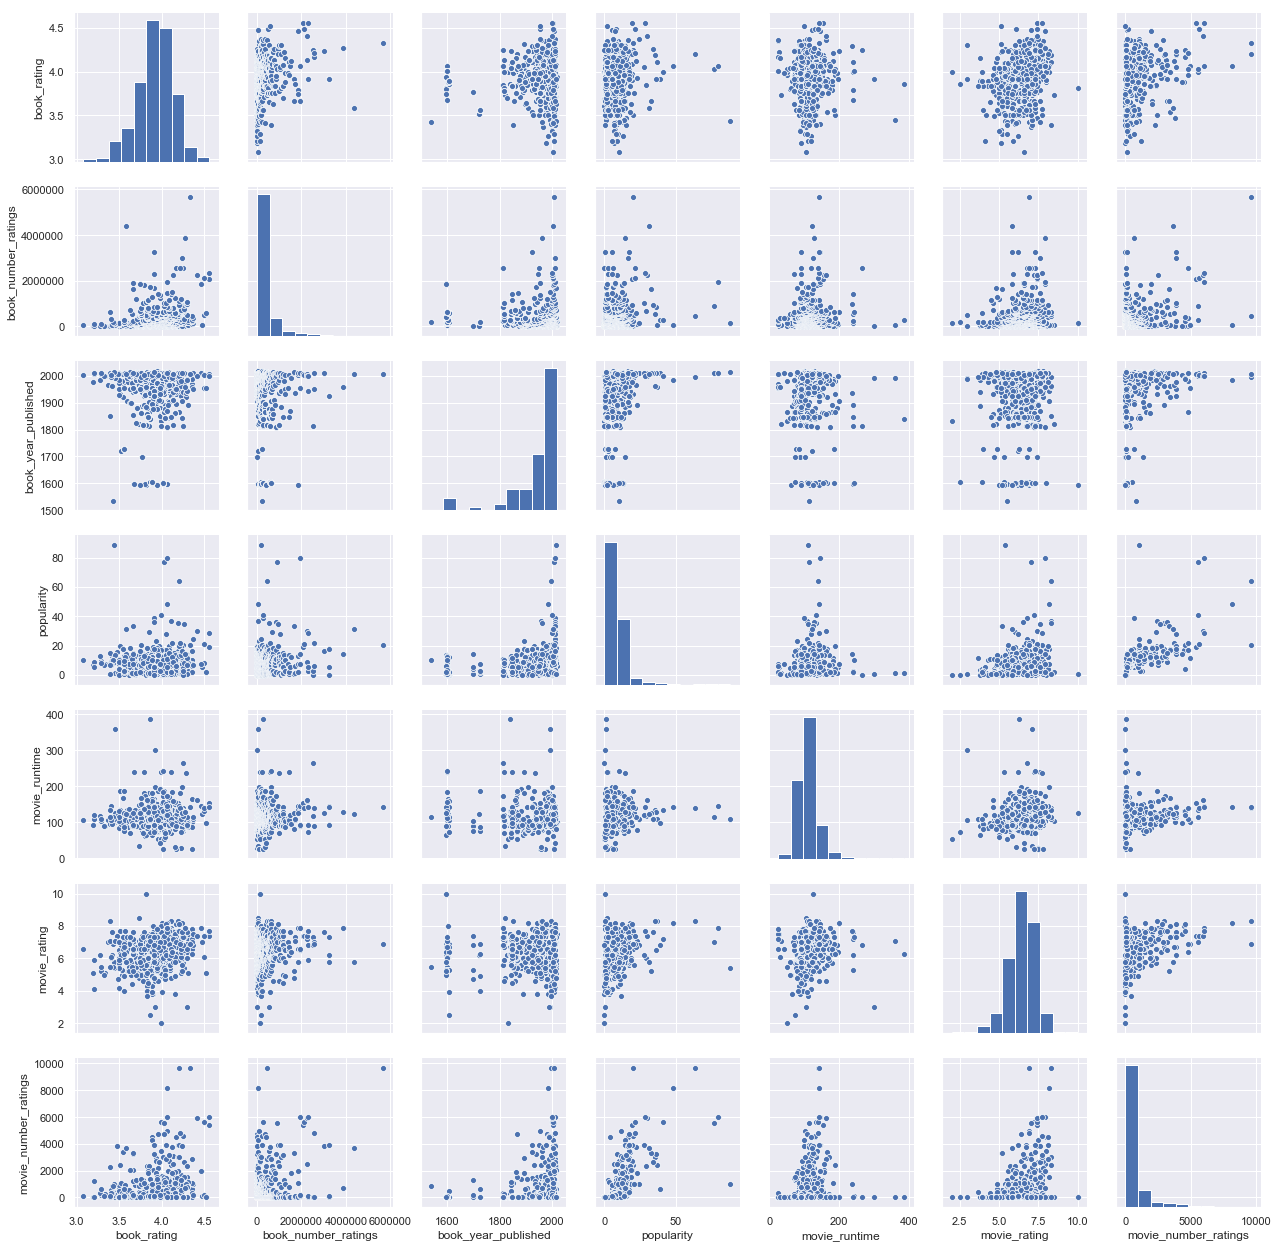

In [194]:
sns.set(font_scale=1) 
sns.pairplot(book_movie); #use log transformation for all the skewed features, using scaling for large-scale feature, standard scaler prefers normally distributed features.

In [195]:
# Create our feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('movie_rating ~ book_rating + book_number_ratings + popularity + movie_runtime + movie_number_ratings', data=book_movie, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           movie_rating   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     25.67
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           8.71e-24
Time:                        15:38:05   Log-Likelihood:                -851.36
No. Observations:                 692   AIC:                             1715.
Df Residuals:                     686   BIC:                             1742.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4033      0.595      4.039      0.000       1.235       3.572
book_rating              0.8857      0.149      5.959      0.000       0.594       1.177
book_number_ratings  -6.369e-08    6.1e-08     -1.045      0.296   -1.83e-07     5.6e-08
popularity               0.0113      0.005      2.142      0.033       0.001       0.022
movie_runtime            0.0036      0.001      3.577      0.000       0.002       0.006
movie_number_ratings     0.0001   3.97e-05      3.778      0.000     7.2e-05       0.000
==============================================================================
Omnibus:                       95.792   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.437
Skew:                          -0.709   Prob(JB):                     3.41e-56
Kurtosis:                       5.617   Cond. No.                     1.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
# Define the model
lm1 = smf.ols('movie_rating ~ book_rating + book_number_ratings + popularity + movie_runtime + movie_number_ratings', data=book_movie)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           movie_rating   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     25.67
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           8.71e-24
Time:                        15:38:08   Log-Likelihood:                -851.36
No. Observations:                 692   AIC:                             1715.
Df Residuals:                     686   BIC:                             1742.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4033      0.595      4.039      0.000       1.235       3.572
book_rating              0.8857      0.149      5.959      0.000       0.594       1.177
book_number_ratings  -6.369e-08    6.1e-08     -1.045      0.296   -1.83e-07     5.6e-08
popularity               0.0113      0.005      2.142      0.033       0.001       0.022
movie_runtime            0.0036      0.001      3.577      0.000       0.002       0.006
movie_number_ratings     0.0001   3.97e-05      3.778      0.000     7.2e-05       0.000
==============================================================================
Omnibus:                       95.792   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.437
Skew:                          -0.709   Prob(JB):                     3.41e-56
Kurtosis:                       5.617   Cond. No.                     1.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

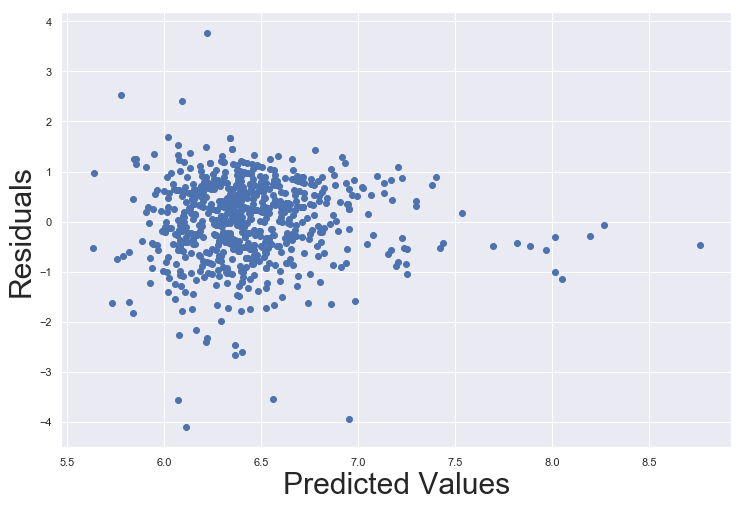

In [197]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);
plt.xlabel('Predicted Values', size = 30)
plt.ylabel('Residuals', size = 30)

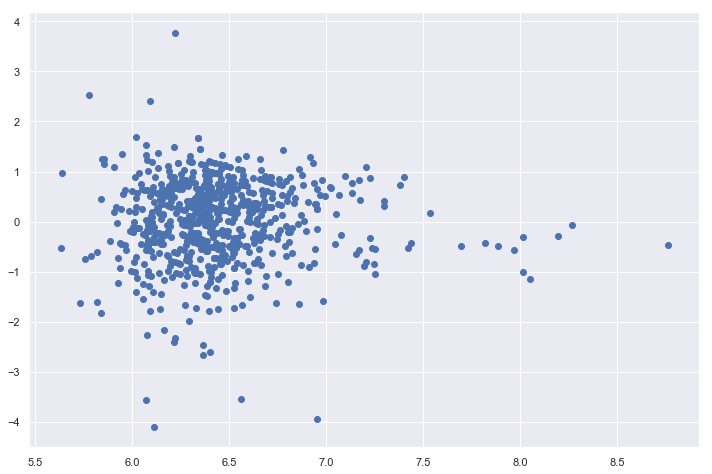

In [198]:
plt.figure(figsize=(12,8))
plt.scatter(fit1.predict(), fit1.resid);

In [199]:
cols = ['book_rating', 'book_number_ratings','popularity','movie_runtime','movie_number_ratings']
X = book_movie[cols]
y = book_movie['movie_rating']

In [15]:
book_movie.to_pickle('book_movie.pkl')

# Assumption 1: regression is linear in parameters and correctly specified

Testing the first regression assumption:

In [200]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

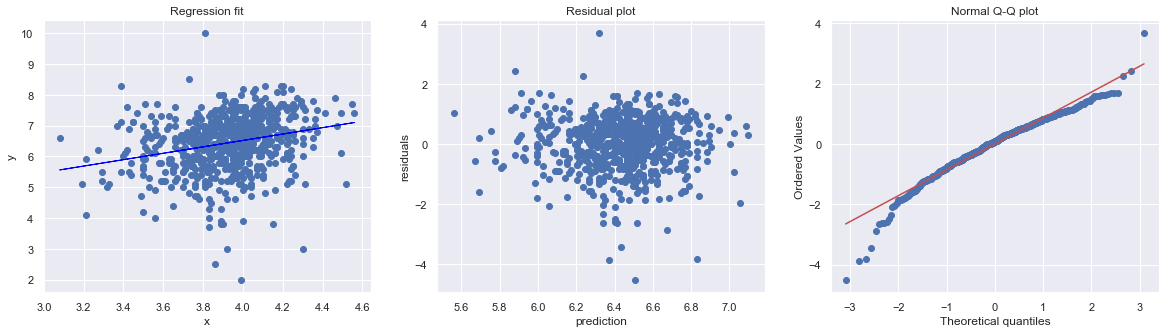

In [201]:
assumption1_x1 = np.array(book_movie['book_rating'])
diagnostic_plot(assumption1_x1.reshape(-1,1), y)

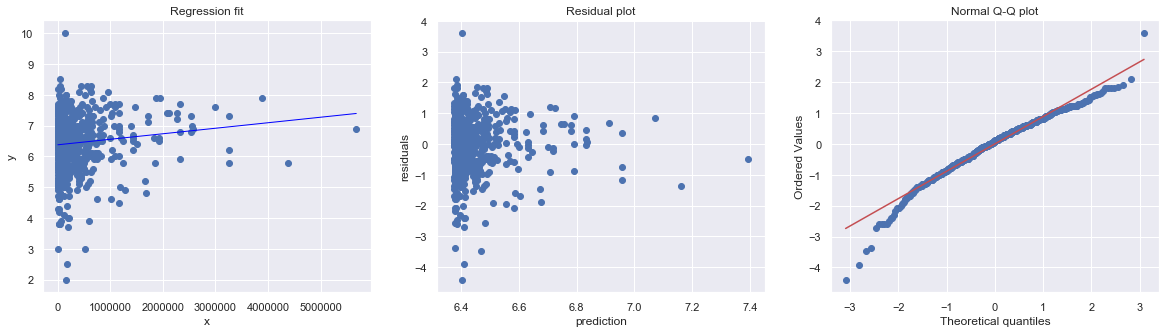

In [202]:
assumption1_x2 = np.array(book_movie['book_number_ratings'])
diagnostic_plot(assumption1_x2.reshape(-1,1), y)

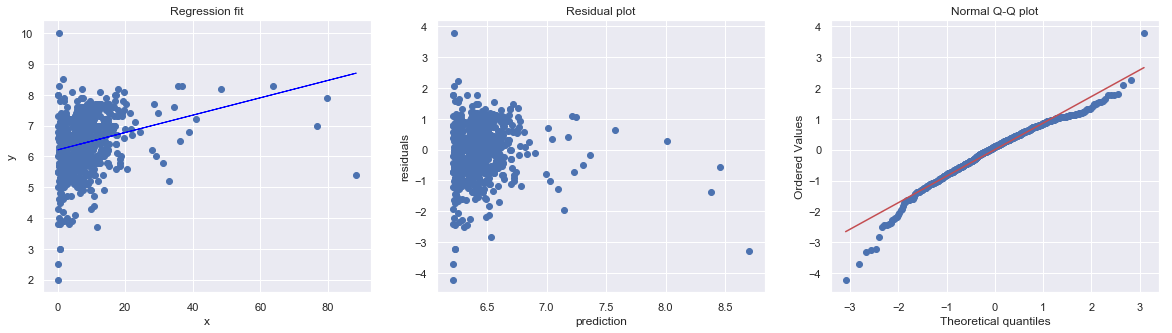

In [203]:
assumption1_x3 = np.array(book_movie['popularity'])
diagnostic_plot(assumption1_x3.reshape(-1,1), y)

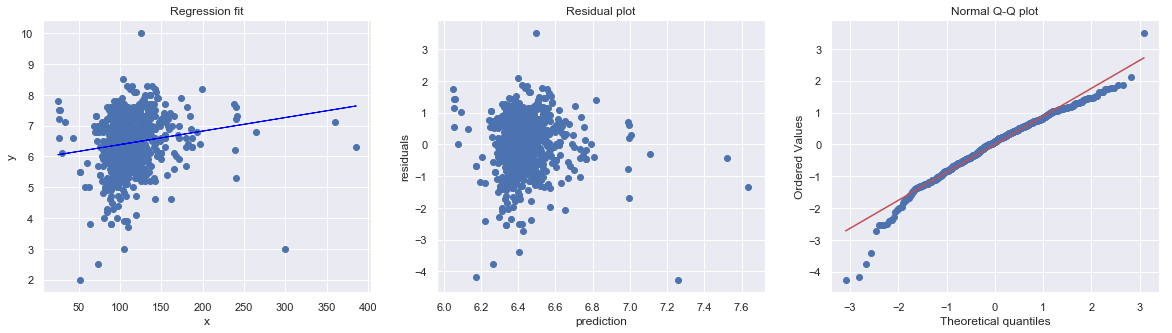

In [122]:
assumption1_x4 = np.array(book_movie['movie_runtime'])
diagnostic_plot(assumption1_x4.reshape(-1,1), y)

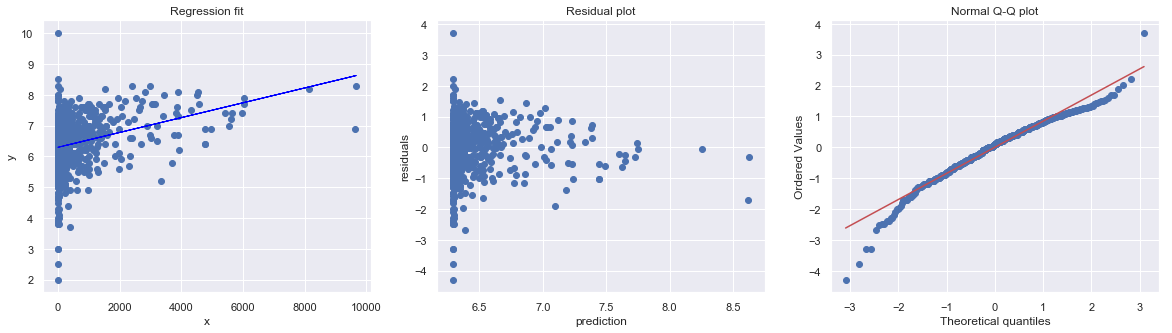

In [123]:
assumption1_x5 = np.array(book_movie['movie_number_ratings'])
diagnostic_plot(assumption1_x5.reshape(-1,1), y)

# Assumption 2: residuals ( ${e_i} = Y_i-\hat{Y}_i$ ) should be normally distributed with zero mean

In [204]:
# develop OLS with Sklearn
cols = ['book_rating', 'book_number_ratings','popularity','movie_runtime','movie_number_ratings']
assumption2_X = book_movie[cols]
assumption2_y = book_movie['movie_rating']
lr = LinearRegression()
fit = lr.fit(assumption2_X,assumption2_y) # for later use

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


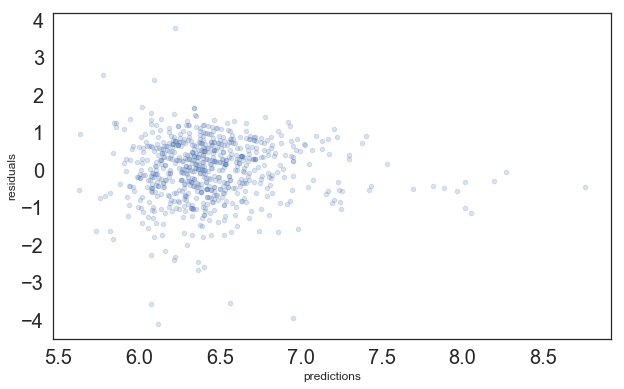

In [205]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis

book_movie['predictions']=fit.predict(assumption2_X)
book_movie['residuals']=book_movie.movie_rating-book_movie.predictions
with sns.axes_style('white'):
    plot=book_movie.plot(kind='scatter',
                  x='predictions',y='residuals',alpha=0.2,figsize=(10,6), fontsize = 20)
#plt.xlabel('Predicted Values', size = 30)
#plt.ylabel('Residuals', size = 30)

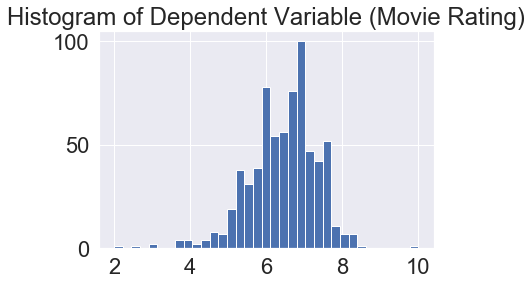

In [88]:
# inspect histogram
book_movie.movie_rating.hist(bins=35)
plt.title('Histogram of Dependent Variable (Movie Rating)');

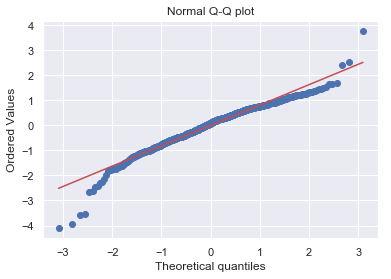

In [206]:
stats.probplot(book_movie['residuals'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Assumption 3: error terms must have constant variance

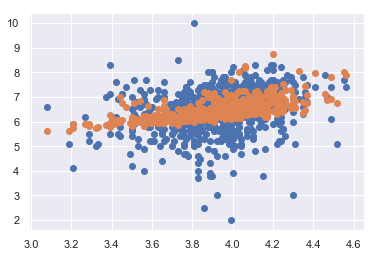

In [140]:
plt.scatter(book_movie.book_rating,y)
plt.scatter(book_movie.book_rating,book_movie.predictions);

Lambda: 2.045049632831309


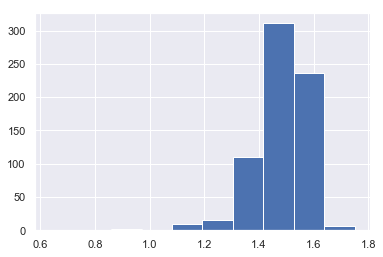

In [152]:
lamb=stats.boxcox_normmax(book_movie.movie_rating, brack=(-10, 10)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb)
y_t=(np.power(book_movie.movie_rating,-0.25)-1)/-0.25

plt.hist(y_t);

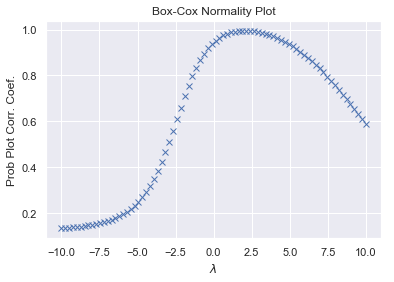

In [150]:
# plot to show optimal lambda values
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(book_movie.movie_rating, -10, 10, plot=ax)

# Assumption 4: errors are uncorrelated across observations

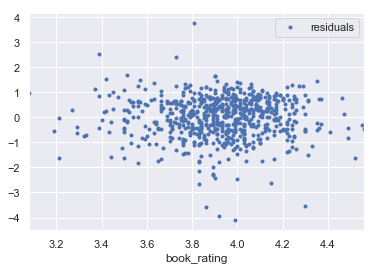

In [207]:
ts = book_movie[['book_rating','residuals']].set_index('book_rating')
ts.plot(style=".");

# Assumption 5: no independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)

Ways to diagnose: 
1. Inspect correlations of independent features
2. Keep an eye on condition number!
    3. As noted above, `statsmodels` will notify you of [large condition numbers](https://en.wikipedia.org/wiki/Condition_number).

Ways to fix:
3. Consider Partial Least Squares or projection into latent space (PCA, introduced in the second-half of the course)
4. Use Ridge regularization - do this for the model!

Incorporating [Ridge regularization](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) not only fixes this issue (if it exists, still safe to use if it doesn't), but it imparts other benefits as well. We'll use Ridge quite often after it's officially introduced!

In [176]:
#Going to continue Ridge regression in a new notebook for clarity purposes.